Revision History: Changed the way Punctuations are handled

### Importing all the required Modules

In [1]:
!pip install tensorflow==2.1
!pip install nltk
!pip install tika
!pip install textblob
!pip3 install --upgrade numpy
!pip install scikit-learn

/usr/bin/sh: pip3: command not found


In [2]:
# To handle Paths
import os

# To remove Hyperlinks and Dates
import re

# To remove Puncutations
import string

'''
# For Tokenization and Accessing Stopwords
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('punkt')
'''

# This helps to remove the unnecessary words from our Text Data
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

# To Parse the Input Data Files
from tika import parser

from textblob import TextBlob

# In order to use the Libraries of Tensorflow
import tensorflow as tf

# For Preprocessing the Text => To Tokenize the Text
from tensorflow.keras.preprocessing.text import Tokenizer
# If the Two Articles are of different length, pad_sequences will make the length equal
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Package for performing Numerical Operations
import numpy as np

# MatplotLib for Plotting Graphs
import matplotlib.pyplot as plt

# To shuffle the Data
from random import shuffle

# To Partition the Data into Train Data and Test Data
from sklearn.model_selection import train_test_split

# To add Regularizer in order to reduce Overfitting
from tensorflow.keras.regularizers import l2

In [3]:
tf.__version__

'2.1.0'

In [4]:
# Give the Path of our Data
Path_Of_Data = '/home/ravikrishnak/Desktop/REsume classification/New_Data'

# Extract the Labels from the Folders inside the Path mentioned above
Unique_Labels_List = os.listdir(Path_Of_Data)
print(Unique_Labels_List)

['Civil', 'Python', 'SAP', 'Mechanical', 'Networking', 'Testing']


In [5]:
def Pre_Process_Data_And_Create_BOW(folder_path):
  #creating empty lists in order to Create Resume Text and the respective Label
  Resumes_List = [] 
  Labels_List = []
  for EachLabel in Unique_Labels_List:      
      for root, dirs, files in os.walk(os.path.join(folder_path, EachLabel),topdown=False):
        for file in files:
          i = 0
          if file.endswith('.pdf'):
            #Access individual file
            Full_Resume_Path = os.path.join(root, file)
            # Parse the Data inside the file
            file_data = parser.from_file(Full_Resume_Path)
            # Extract the Content of the File
            Resume_Text = file_data['content']
            
            # Below Code removes the Hyperlinks in the Resume, like LinkedIn Profile, Certifications, etc..
            HyperLink_Regex = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
            Text_Without_HL = re.sub(HyperLink_Regex, ' ', Resume_Text, flags=re.MULTILINE)

            # Below Code removes the Date from the Resume
            Date_regEx = r'(?:\d{1,2}[-/th|st|nd|rd\s]*)?(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)?[a-z\s,.]*(?:\d{1,2}[-/th|st|nd|rd)\s,]*)+(?:\d{2,4})+'
            CleanedText = re.sub(Date_regEx,' ',Text_Without_HL)

            List_Of_All_Punctuations = list(string.punctuation)
            Important_Punctuations = ['#', '.', '+' , '-'] #Add more, if any other Punctuation is observed as Important

            NewLineChar = '\n'

            # Below Set Comprises all the Punctuations, which can be Removed from the Text of Resume
            Total_Punct = len(List_Of_All_Punctuations)

            for EachImpPunct in Important_Punctuations:
                for CountOfPunct in range(Total_Punct):
                    if CountOfPunct == Total_Punct:
                        break
                    elif EachImpPunct == List_Of_All_Punctuations[CountOfPunct]:
                        del List_Of_All_Punctuations[CountOfPunct]
                        Total_Punct = Total_Punct - 1

            List_Of_All_Punctuations.append(NewLineChar)

            for EachPunct in List_Of_All_Punctuations:
                CleanedText = CleanedText.replace(EachPunct, " ")
            
            # Below Code converts all the Words in the Resume to Lowercase ======> Check if it has to come after Tokenization if Splitting Code is delet instead of integed
            #Final_Cleaned_Resume_Text = Text_Without_Punct.lower()
            Final_Cleaned_Resume_Text = CleanedText.lower()

            #Code to remove Stopwords from each Resume
            for word in STOPWORDS:
                #stop_token = ' ' + word + ' '
                stop_token = word
                Resume_Text = Final_Cleaned_Resume_Text.replace(stop_token, ' ')
                #Resume_Text = Resume_Text.replace(' ', ' ')
            Resumes_List.append(Resume_Text)
            Labels_List.append(EachLabel)
      #print('Successfully executed for the Folder, ', EachLabel)
  #Return Final Lists
  return Resumes_List, Labels_List

In [6]:
#calling the function and passing the path
Resumes_List,  Labels_List = Pre_Process_Data_And_Create_BOW(Path_Of_Data)

In [7]:
Resumes_List[0]

'   …   … 1 3  current designation  billing nd civil site engineer  current company  kailash infrastructure pvt. ltd  current location  delhi  pref. location  delhi   ncr jaipur lucknow  functional area  site engineering   project management  role  construction-general building  industry  oil and gas power infrastructure energy  date of birth   gender      male  marital status  single unmarried  total experience  3 year s  7 month s   annual salary  rs 3.55 lac s   notice period  15 days or less  highest degree  pg diploma  civil   address  blocke- nearambedkarpark samratchowk - vijaynaga  ghaziabad -   verified    phone number     email - id   kailash infrastructure pvt. ltd as billing nd civil site engineer    to till date client -siemens gamesa renwable enegry  environment -  mw wind power project. costofproject  cr.   som projectspvt.ltd as junior engineer civil   to   client -tatamotorsltd. environment -industrialconstructiondivision. costofproject  cr.  id  af  last active  17-de

In [8]:
type(Resumes_List)

list

In [9]:
print("Total Number of Classes are ", len(Unique_Labels_List))
print("Total Number of Resumes are ", len(Resumes_List))
print("Total Number of Labels are ", len(Labels_List))

Total Number of Classes are  6
Total Number of Resumes are  1963
Total Number of Labels are  1963


In [10]:
# Code to Delete the Duplicate Resumes and the Respective Labels

Total_Number_Of_Resumes = len(Resumes_List)

Count = 0

for Each_Resume in Resumes_List:
    
    for Instance_Count in range(Count+1, Total_Number_Of_Resumes):
        if Instance_Count == Total_Number_Of_Resumes:
            break
        elif Each_Resume == Resumes_List[Instance_Count]:
          del Resumes_List[Instance_Count]
          del Labels_List[Instance_Count]
          Total_Number_Of_Resumes = Total_Number_Of_Resumes - 1
    Count = Count + 1

In [11]:
print("Total Number of Classes are ", len(Unique_Labels_List))
print("Total Number of Unique Resumes are ", len(Resumes_List))
print("Total Number of Unique Labels are ", len(Labels_List))

Total Number of Classes are  6
Total Number of Unique Resumes are  1911
Total Number of Unique Labels are  1911


In [12]:
vocab_size = 5000
#vocab_size = 8000
# We want the Output of the Embedding Layer to be 64
embedding_dim = 64
#max_length = 200
max_length = 800
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
# Taking 80% of the Data as Training Data and remaining 20% will be for Test Data
training_portion = .8

In [13]:
# Size of Train Data is 80% of the Entire Dataset => 0.8 * 2225

Train_Resume_Size = int(len(Resumes_List) * training_portion)
'''
# Extracting Train Data
Train_Resume_Data = Resumes_List[0: Train_Resume_Size]
Train_Labels = Labels_List[0: Train_Resume_Size]

# Extracting Validation Data
Validation_Resume_Data = Resumes_List[Train_Resume_Size:]
Validation_Labels = Labels_List[Train_Resume_Size:]
'''

Train_Resume_Data, Validation_Resume_Data, Train_Labels, Validation_Labels = \
                    train_test_split(Resumes_List, Labels_List, train_size = training_portion, 
                                     shuffle = True
                                     , stratify= Labels_List)

print('train_size = {}'.format(Train_Resume_Size))
print('Number of Train Resumes = {}'.format(len(Train_Resume_Data)))
print('Number of Train Labels = {}'.format(len(Train_Labels)))
print('Number of Validation Resumes = {}'.format(len(Validation_Resume_Data)))
print('Number of Validation Labels = {}'.format(len(Validation_Labels)))

train_size = 1528
Number of Train Resumes = 1528
Number of Train Labels = 1528
Number of Validation Resumes = 383
Number of Validation Labels = 383


In [15]:
from statistics import mean
print('Average Number of Words in Each Training Resume is {}'.format(mean([len(i) for i in Train_Resume_Data])))

Average Number of Words in Each Training Resume is 5371.485602094241


In [16]:
type(Train_Resume_Data[0])

str

In [17]:
print("Number of Unique Training Labels = {}".format(len(set(Train_Labels))))
print("Number of Unique Validation Labels = {}".format(len(set(Validation_Labels))))

Number of Unique Training Labels = 6
Number of Unique Validation Labels = 6


In [18]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(Train_Resume_Data)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'and': 2,
 'of': 3,
 'the': 4,
 'to': 5,
 'in': 6,
 'for': 7,
 'project': 8,
 's': 9,
 'management': 10}

In [19]:
# Convert the Word Tokens into Integer equivalents, before passing it to keras embedding layer
train_sequences = tokenizer.texts_to_sequences(Train_Resume_Data)
#print(train_sequences[10])

from statistics import mean

# To calculate the average length of all the Train Resumes
print('Average Number of Words in Each Training Resume is {}'.format(mean([len(i) for i in train_sequences])))

Average Number of Words in Each Training Resume is 745.3933246073299


In [20]:
type(train_sequences)

list

In [21]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

577
800
933
800
491
800


In [22]:
print(len(train_padded))

1528


In [23]:
type(train_padded)

numpy.ndarray

In [24]:
validation_sequences = tokenizer.texts_to_sequences(Validation_Resume_Data)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

383
(383, 800)


In [25]:
# Initializing the Tokenizer Object
label_tokenizer = Tokenizer()

# We are (Fitting) using "fit_on_texts" here, which we 
# haven't used for Test Data because we want the Labels to be Tokenized differently from that of Training Data

label_tokenizer.fit_on_texts(Unique_Labels_List)

# Since it should be a Numpy Array, we should Convert the Sequences to Numpy Array, for both Training and 
# Test Labels

#training_label_seq = np.array(label_tokenizer.texts_to_sequences(Train_Labels))

#validation_label_seq = np.array(label_tokenizer.texts_to_sequences(Validation_Labels))

In [31]:
training_label_list = label_tokenizer.texts_to_sequences(Train_Labels)

for x in training_label_list:
  x[0] = x[0] - 1

In [33]:
validation_label_list = label_tokenizer.texts_to_sequences(Validation_Labels)
for x in validation_label_list:
  x[0] = x[0] - 1

In [34]:
training_label_seq = np.hstack(training_label_list)
training_label_seq

array([1, 5, 3, ..., 3, 5, 0])

In [35]:
validation_label_seq = np.hstack(validation_label_list)
validation_label_seq

array([2, 1, 2, 1, 1, 3, 2, 3, 3, 2, 2, 1, 0, 4, 0, 4, 1, 2, 0, 1, 4, 4,
       5, 2, 3, 0, 5, 4, 4, 5, 3, 0, 4, 4, 5, 3, 3, 2, 2, 2, 2, 2, 2, 2,
       4, 1, 0, 5, 3, 3, 0, 1, 2, 2, 1, 3, 3, 2, 1, 2, 1, 2, 1, 3, 4, 3,
       3, 1, 0, 0, 4, 0, 2, 0, 0, 4, 1, 5, 1, 2, 5, 4, 1, 3, 4, 2, 1, 4,
       0, 1, 2, 2, 5, 5, 4, 2, 1, 2, 3, 3, 1, 0, 1, 0, 3, 5, 0, 3, 2, 0,
       5, 1, 5, 4, 5, 1, 1, 1, 5, 1, 0, 3, 1, 2, 5, 4, 4, 4, 1, 4, 2, 0,
       4, 0, 3, 4, 2, 3, 2, 5, 4, 4, 4, 0, 4, 4, 0, 5, 0, 0, 4, 5, 1, 2,
       5, 0, 0, 5, 1, 5, 3, 0, 5, 0, 3, 4, 1, 3, 0, 5, 0, 0, 0, 3, 2, 1,
       4, 3, 0, 5, 4, 4, 5, 0, 3, 0, 5, 2, 2, 3, 0, 0, 3, 3, 3, 4, 5, 3,
       1, 5, 3, 1, 4, 5, 3, 3, 4, 2, 0, 5, 5, 3, 2, 3, 1, 3, 0, 0, 2, 2,
       0, 0, 5, 0, 3, 5, 3, 0, 2, 4, 4, 4, 2, 3, 0, 1, 2, 3, 0, 1, 4, 2,
       0, 5, 4, 2, 2, 0, 5, 3, 5, 4, 0, 3, 1, 1, 4, 1, 1, 2, 2, 5, 5, 5,
       1, 5, 1, 5, 3, 4, 0, 5, 4, 4, 3, 5, 5, 4, 5, 3, 4, 1, 2, 5, 5, 2,
       3, 3, 2, 5, 2, 2, 5, 1, 2, 3, 5, 5, 3, 4, 3,

In [36]:
print('type(training_label_seq) = {}'.format(type(training_label_seq)))
print('type(validation_label_seq) = {}'.format(type(validation_label_seq)))

print('(training_label_seq[0:5]) = {}'.format(training_label_seq[0:5]))
print('(validation_label_seq[0:5]) = {}'.format(validation_label_seq[0:5]))

print('len(training_label_seq) = {}'.format(len(training_label_seq)))
print('len(validation_label_seq) = {}'.format(len(validation_label_seq)))

type(training_label_seq) = <class 'numpy.ndarray'>
type(validation_label_seq) = <class 'numpy.ndarray'>
(training_label_seq[0:5]) = [1 5 3 0 3]
(validation_label_seq[0:5]) = [2 1 2 1 1]
len(training_label_seq) = 1528
len(validation_label_seq) = 383


In [37]:
type(validation_label_seq[1])

numpy.int64

In [38]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('-------------------------------------------------------------------------')
print(Train_Resume_Data[10])

… … 1 3 current designation senior software engineer current company <OOV> current location noida pref location noida gurgaon delhi ncr functional area it software erp crm role software developer industry it software software services marital status married total experience 7 year s 0 month s notice period 15 days or less highest degree m tech computers verified phone number email id <OOV> as senior software engineer to till date i am working as senior software engineer at client wipro working in python django and angularjs <OOV> labs limited mumbai as senior software engineer to i worked in python and network automation using django and flask digital marketing systems pvt ltd as software engineer developer to i was <OOV> as a sr software <OOV> in <OOV> django flask and iot using python and <OOV> <OOV> <OOV> digital solution pvt ltd as hadoop developer trainee to id <OOV> last active 15 feb 20 last modified 3 feb 20 <OOV> gupta software engineer seeking roles in software development ap

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list). => Has taken more than 6 hours to resolve this. Finally, https://stackoverflow.com/a/42499122/11530462 has resolved it

ValueError: Input arrays should have the same number of samples as target arrays. Found 3002 input samples and 3717 target samples. https://stackoverflow.com/a/60239112/11253331 has resolved it

In [40]:
Regularizer = l2(0.001)

model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              embeddings_regularizer = Regularizer),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 18 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          320000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 390       
Total params: 431,814
Trainable params: 431,814
Non-trainable params: 0
_________________________________________________________________


In [41]:
#Using Early Stopping in order to handle Overfitting
ES_Callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

num_epochs = 100

history = model.fit(x = train_padded, y = training_label_seq, epochs=num_epochs, 
                    callbacks=[ES_Callback],
                    validation_data=(validation_padded, validation_label_seq),
                    batch_size = 32, shuffle=True, verbose=1)

Train on 1528 samples, validate on 383 samples
Epoch 1/100


/home/ravikrishnak/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/ravikrishnak/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


1528/1528 [==============================] - 46s 30ms/sample - loss: 1.7491 - accuracy: 0.2336 - val_loss: 1.4375 - val_accuracy: 0.3290
Epoch 2/100
1528/1528 [==============================] - 41s 27ms/sample - loss: 1.3583 - accuracy: 0.3940 - val_loss: 1.1341 - val_accuracy: 0.5013
Epoch 3/100
1528/1528 [==============================] - 42s 27ms/sample - loss: 0.8593 - accuracy: 0.6466 - val_loss: 0.6955 - val_accuracy: 0.7180
Epoch 4/100
1528/1528 [==============================] - 42s 28ms/sample - loss: 0.5220 - accuracy: 0.7768 - val_loss: 0.5041 - val_accuracy: 0.7807
Epoch 5/100
1528/1528 [==============================] - 46s 30ms/sample - loss: 1.0944 - accuracy: 0.7277 - val_loss: 2.1636 - val_accuracy: 0.1828
Epoch 6/100
1528/1528 [==============================] - 41s 27ms/sample - loss: 1.8577 - accuracy: 0.1950 - val_loss: 1.8033 - val_accuracy: 0.2063
Epoch 7/100
1528/1528 [==============================] - 47s 31ms/sample - loss: 1.7119 - accuracy: 0.2533 - val_loss:

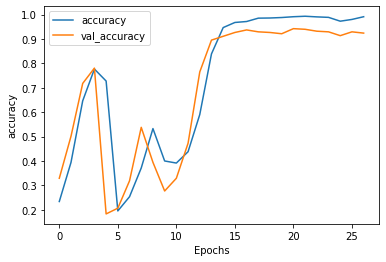

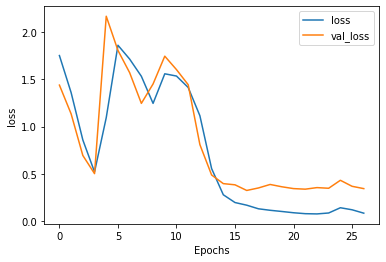

In [42]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [43]:
version = 1
MODEL_DIR = 'Resume_Classification_Model'
export_path = os.path.join(MODEL_DIR, str(version))

tf.keras.models.save_model(model = model, filepath = export_path)

!ls -l {export_path}

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Resume_Classification_Model/1/assets
total 4668
drwxr-xr-x 2 ravikrishnak primarygroup    4096 Mar 17 16:40 assets
-rw-r--r-- 1 ravikrishnak primarygroup 4769830 Mar 17 16:40 saved_model.pb
drwxr-xr-x 2 ravikrishnak primarygroup    4096 Mar 17 16:40 variables


In [44]:
!saved_model_cli show --dir {export_path} --all

2020-03-17 16:40:22.042011: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory
2020-03-17 16:40:22.042103: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory
2020-03-17 16:40:22.042114: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.

MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_

In [45]:
pwd

'/home/ravikrishnak/Desktop/REsume classification/Ravi'